In [90]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import base64
from IPython.display import HTML

In [91]:
def create_gif(env, Q, num_episodes, max_steps_per_episode):
    frames = []
    for episode in range(num_episodes):
        state = env.reset()
        for step in range(max_steps_per_episode):
            # Add the current state to the animation
            img = env.render(mode='rgb_array')
            frames.append(img)

            action = np.argmax(Q[state])
            state, reward, done, _ = env.step(action)

            if done:
                break

    # Create the GIF file
    fig = plt.figure(figsize=(5, 5))
    im = plt.imshow(frames[0])
    plt.axis('off')

    def update_frame(i):
        im.set_data(frames[i])
        return [im]

    # Set delay to 1 second between frames
    ani = animation.FuncAnimation(fig, update_frame, frames=len(frames), interval=1000, blit=True)
    ani.save('taxi_animation.gif', writer='pillow', fps=10)

In [92]:
# Create the environment
env = gym.make('Taxi-v3')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [93]:
# Q-learning parameters
alpha = 0.3        # Learning rate
gamma = 0.9        # Discount factor
epsilon = 1.0      # Exploration parameter
epsilon_decay = 0.995  # Decay rate for ε
min_epsilon = 0.01  # Minimum value for ε

In [94]:
# Initialize Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [95]:
# Training parameters
num_episodes = 5000
max_steps_per_episode = 100

# Train the agent
for episode in range(num_episodes):
    state = env.reset()  # Initial state
    total_reward = 0

    for step in range(max_steps_per_episode):
        # Action selection (ε-greedy method)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Exploration
        else:
            action = np.argmax(Q[state])  # Exploitation

        # Execute action and get new data
        next_state, reward, done, _ = env.step(action)  # Note the 4 values
        total_reward += reward

        # Update Q-table
        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

        state = next_state

        if done:
            break

    # Decay ε
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Periodic progress check
    if episode % 100 == 0:
        print(f"Episode: {episode}, Reward: {total_reward}")

print("Training completed.")

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 0, Reward: -442
Episode: 100, Reward: -289
Episode: 200, Reward: -190
Episode: 300, Reward: -60
Episode: 400, Reward: -8
Episode: 500, Reward: -38
Episode: 600, Reward: 3
Episode: 700, Reward: 5
Episode: 800, Reward: 13
Episode: 900, Reward: 4
Episode: 1000, Reward: 11
Episode: 1100, Reward: 4
Episode: 1200, Reward: 13
Episode: 1300, Reward: 4
Episode: 1400, Reward: 6
Episode: 1500, Reward: 7
Episode: 1600, Reward: -7
Episode: 1700, Reward: 8
Episode: 1800, Reward: 5
Episode: 1900, Reward: 7
Episode: 2000, Reward: 10
Episode: 2100, Reward: 10
Episode: 2200, Reward: 5
Episode: 2300, Reward: 8
Episode: 2400, Reward: 6
Episode: 2500, Reward: 4
Episode: 2600, Reward: 11
Episode: 2700, Reward: 9
Episode: 2800, Reward: 10
Episode: 2900, Reward: 13
Episode: 3000, Reward: 7
Episode: 3100, Reward: 4
Episode: 3200, Reward: 10
Episode: 3300, Reward: 8
Episode: 3400, Reward: 9
Episode: 3500, Reward: 10
Episode: 3600, Reward: 9
Episode: 3700, Reward: 8
Episode: 3800, Reward: 11
Episode: 39

In [96]:
# Evaluate the agent's performance
num_test_episodes = 100
total_rewards = 0

for episode in range(num_test_episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)  # Note the 4 values
        total_reward += reward

        if done:
            break

    total_rewards += total_reward

print(f"Average reward for test episodes: {total_rewards / num_test_episodes}")

Average reward for test episodes: 8.22


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


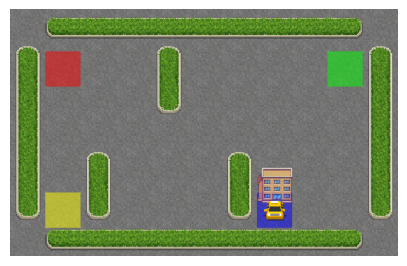

In [97]:
# Create the animation after training is complete
create_gif(env, Q, num_episodes=10, max_steps_per_episode=100)

In [98]:
# Display the GIF animation
def display_gif(file_path):
    with open(file_path, 'rb') as f:
        data = f.read()
        encoded = base64.b64encode(data).decode('utf-8')
        display(HTML(f'<img src="data:image/gif;base64,{encoded}"/>'))

display_gif('taxi_animation.gif')

Output hidden; open in https://colab.research.google.com to view.